##Stock Price Prediction



*   Project By: Purva Natoo
*   Model used: Linear Regression
*   API used for data: Yahoo Finance



Getting necessary imports

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
from datetime import datetime

In [ ]:
!pip install requests_html

In [ ]:
!pip install yahoo_fin
from yahoo_fin.stock_info import get_data

Get stock ticker name from user

In [14]:
ticker = input("Enter the stock ticker name (Enter 'none' for default): ")
if ticker=='none':
  ticker = 'amzn'

Enter the stock ticker name (Enter 'none' for default): amzn


Get start date of dataset from user

In [15]:
startYear = input("Enter the start year to be considered for the dataset(Enter 'none' for default):")
if startYear=='none':
  startYear = '2015'
startDate = '01/01/' + startYear

Enter the start year to be considered for the dataset(Enter 'none' for default):2015


Get historic data for the stock using yahoo_fin

In [16]:
stock_data = get_data(ticker, start_date=startDate, end_date=datetime.today().strftime('%m/%d/%Y'), index_as_date = True, interval="1d")
dates = list(range(0,int(len(stock_data))))
prices = stock_data['close']
stock_data

,open,high,low,close,adjclose,volume,ticker
2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,AMZN
2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200,AMZN
2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000,AMZN
2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300,AMZN
2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400,AMZN
...,...,...,...,...,...,...,...
2021-12-31,3379.120117,3387.000000,3331.169922,3334.340088,3334.340088,2387300,AMZN
2022-01-03,3351.000000,3414.070068,3323.209961,3408.090088,3408.090088,3176000,AMZN
2022-01-04,3408.760010,3428.000000,3326.989990,3350.439941,3350.439941,3536300,AMZN
2022-01-05,3337.659912,3342.530029,3287.139893,3287.139893,3287.139893,3215100,AMZN


Impute the missing data with the median data 

In [17]:
prices[np.isnan(prices)] = np.median(prices[~np.isnan(prices)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Plot the original data

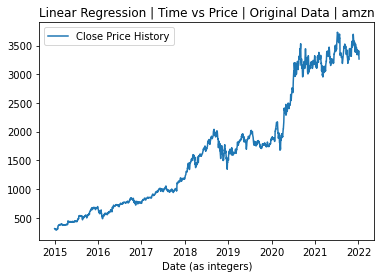

In [18]:
plt.plot(stock_data['close'], label = 'Close Price History')
plt.title('Linear Regression | Time vs Price | Original Data | '+ticker)
plt.legend()
plt.xlabel('Date (as integers)')
plt.show()

Convert dates and prices to numpy array

In [19]:
dates = np.asanyarray(dates)
prices = np.asanyarray(prices)
dates = np.reshape(dates,(len(dates), 1))
prices = np.reshape(prices,(len(prices), 1))

Get previous model accuracy - Load pickle file

In [20]:
try:
  pick_in = pickle.open('prediction.pickle', 'rb')
  reg = pickle.load(pick_in)
  xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.2)
  best = reg.score(ytrain, ytest)
except:
  pass

Get the best accuracy model

In [21]:
best = 0
for _ in range(100):
  xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size = 0.2)
  reg = LinearRegression().fit(xtrain, ytrain)
  acc = reg.score(xtest, ytest)
  if acc > best:
    best = acc
    #Save model as pickle file
    with open('prediction.pickle', 'wb') as f:
      pickle.dump(reg, f)
    print(acc)

0.9263984089877264
0.9268856409577317
0.927297422775169
0.9297659021573204
0.931334238912116


Load the regression model

In [22]:
pick_in = open('prediction.pickle','rb')
reg = pickle.load(pick_in)

Find average accuracy

In [23]:
mean = 0
for i in range(10):
  msk = np.random.rand(len(stock_data)) < 0.8
  xtest = dates[~msk]
  ytest = prices[~msk]
  mean += reg.score(xtest, ytest)

print("Average Accuracy: ", mean/10)

Average Accuracy:  0.9221836689587223


Get the number of days after which the user wants to predict the stock price

In [31]:
noOfDays = int(input('Enter the number of days after which you wish to predict the stock price(Max value: 365):'))
if noOfDays > 365:
  print("Error: Invalid input - Max number of days is 365. Giving results using default value = 365")
  noOfDays = 365
elif noOfDays < 0:
  print("Error: Invalid input - Min number of days is 0. Giving results using default value = 365")
  noOfDays = 365

Enter the number of days after which you wish to predict the stock price(Max value: 365):366
Error: Invalid input - Max number of days is 365. Giving results using default value = 365


Predict stock price

In [35]:
predicted_price = reg.predict(np.array([[int(len(dates)+noOfDays)]]))
for i in predicted_price:
  for j in i:
    print("Expected stock price after", noOfDays, " days is:", j)

Expected stock price after 365  days is: 4024.8691737447025


Plot the expected and actual values

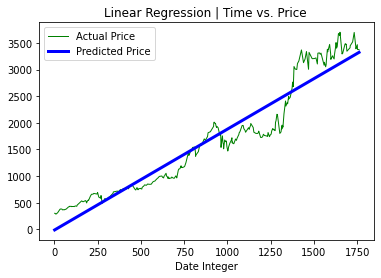

In [36]:
plt.plot(xtest, ytest, color='green',linewidth=1, label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, reg.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price ')
plt.legend()
plt.xlabel('Date Integer')
plt.show()